# 1.Kütüphane Import İşlemleri

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning )
warnings.filterwarnings("ignore", category=FutureWarning )
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

# 1.1. Veriye HızlıBakış

In [ ]:
# Mnist veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Eğitim Seti Boyutu;", x_train.shape, y_train.shape)

Eğitim Seti Boyutu; (60000, 28, 28) (60000,)


In [ ]:
print("Test Seti Boyutu;", x_test.shape, y_test.shape)

Test Seti Boyutu; (10000, 28, 28) (10000,)


In [ ]:
num_labels = len(np.unique(y_train))
num_labels

10

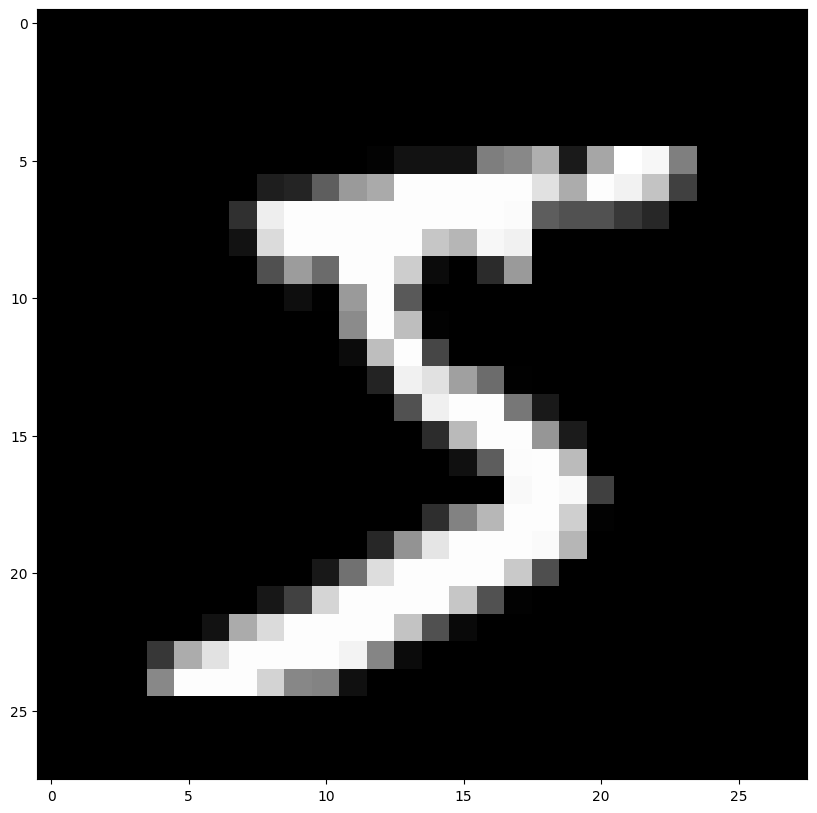

In [ ]:
# Veri setinden örnek resim gösterilmesi

plt.figure(figsize = (10,10))
plt.imshow(x_train[0], cmap = "gray") # Eğitim setindeki ilk gözlem

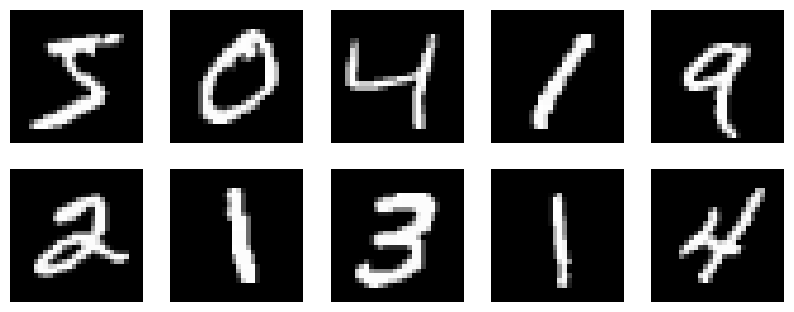

In [ ]:
plt.figure(figsize = (10,10))
for n in range(10):
  ax = plt.subplot(5,5, n+1)
  plt.imshow(x_train[n], cmap = "gray")
  plt.axis("off")

In [ ]:
def visualize_img(data):
  for n in range(10):
    ax = plt.subplot(5,5, n+1)
    plt.imshow(x_train[n], cmap = "gray")
    plt.axis("off")


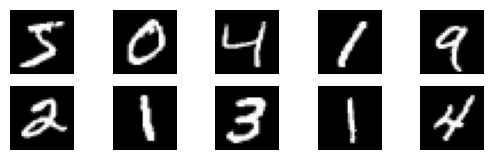

In [ ]:
visualize_img(x_train)

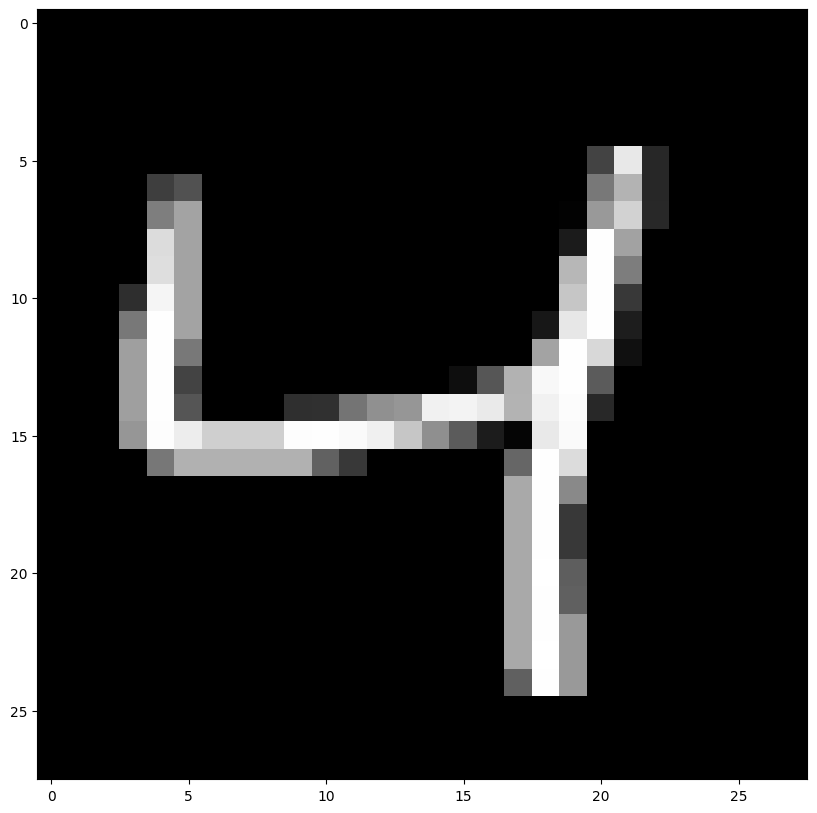

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(x_train[2], cmap = "gray")

In [ ]:
x_train[2].shape #RGB;(0,255)

(28, 28)

In [ ]:
x_train[2][10,10]

0

In [ ]:
x_train[2][14,10]

49

In [ ]:
x_train[2][14:20,10:20]

array([[ 49, 116, 144, 150, 241, 243, 234, 179, 241, 252],
       [254, 250, 240, 198, 143,  91,  28,   5, 233, 250],
       [ 98,  56,   0,   0,   0,   0,   0, 102, 254, 220],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254, 137],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57],
       [  0,   0,   0,   0,   0,   0,   0, 169, 254,  57]], dtype=uint8)

In [ ]:
x_train[2][14:20,10:20].mean() #Belirli bölgeye zoom yapma işlemi gibi düşünülebilir.

96.51666666666667

In [ ]:
def pixel_visulation(img):
  fig = plt.figure(figsize = (12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap = "gray")
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range (width):
    for y in range (height):

      ax.annotate(str(round(img[x][y],2)), xy = (y,x),
                  color = "white" if img[x][y]<threshold else "black")

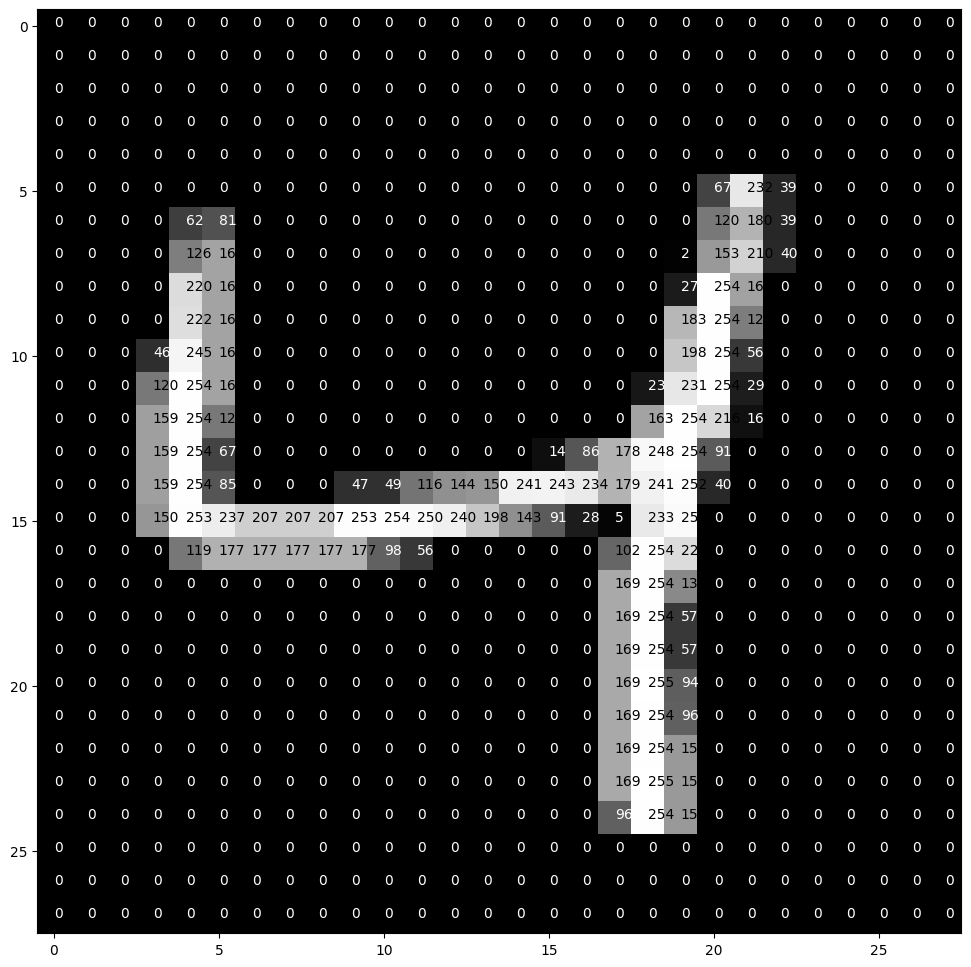

In [ ]:
pixel_visulation(x_train[2])

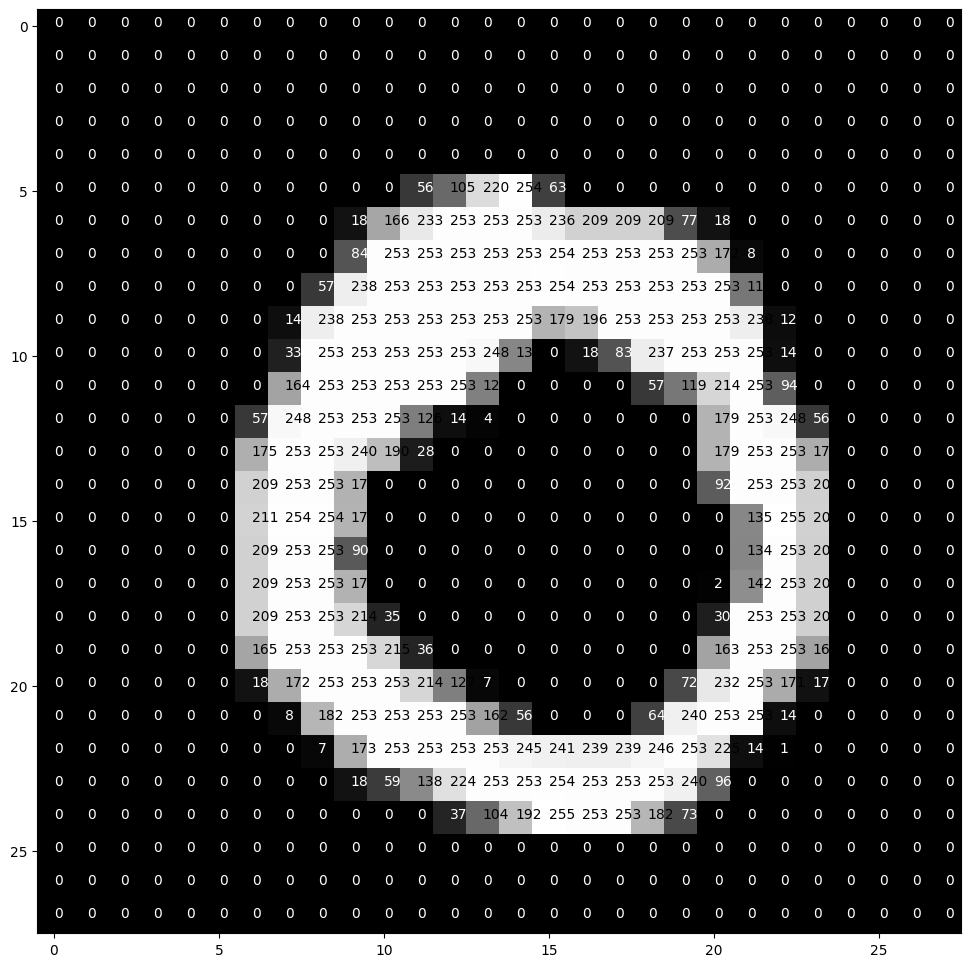

In [ ]:
pixel_visulation(x_train[56])

# 2.Encoding
* Önce : [ 0,1,2,3,4,5,6,7,8,9]
* Sonra:
örnek: 2 İçin:
[0,0,1,0,0,0,0,0,0,0]

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
x_train[0:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
# Assuming y_train is your original labels
y_train2 = y_train.astype('int')
y_test2 = y_test.astype('int')

# Convert to one-hot encoding using Keras to_categorical
y_train = to_categorical(y_train2, num_classes=10)  # Assuming you have 10 classes
y_test = to_categorical(y_test2, num_classes=10)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 3.Reshaping

In [ ]:
image_size = x_train.shape[1]
image_size

28

In [ ]:
print("Eğitim Seti Boyutu ", x_train.shape)
print("Test Seti Boyutu", x_test.shape)

Eğitim Seti Boyutu  (60000, 28, 28)
Test Seti Boyutu (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1) #buradaki 1 görseldeki pixellerimizin değerlerini tutan yerdir.
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(f"Eğitim Seti Boyutu: {x_train.shape}")
print(f"Test Seti Boyutu: {x_test.shape}")

Eğitim Seti Boyutu: (60000, 28, 28, 1)
Test Seti Boyutu: (10000, 28, 28, 1)


# 4.Standardization

In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# 5.Modelleme

**Sinir Ağı Mimarisini Tanımlamak**

In [ ]:
# Sinir Ağının Dış (Katman) Özellikleri
model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation = "relu", name="hidden_layer1"), #Gizli katmanda relu kullanılır.
    Dense(units=num_labels, activation="softmax", name= "output_layer")]) #Çok sınıflı problemde çıktı katmanında aktivasyon kodu softmax fonk., sigmoid fonk. ise iki sınıflı sınıflandırma probleminde kullanılır.


#Sinir Ağının İç Özellikleri
model.compile(loss = "categorical_crossentropy", # Çok sınıflandırmalı problemlerdeki loss
              optimizer= "adam", #Lossu optimize eden optimizasyon yöntemi algoritması, ikili sınıflandırmada = gradient destence
              metrics= [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])


#NOT: Model Kurmadık Modelin Yapısını Tanımladık!

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_test,y_test))

Epoch 1/5
469/469 [==============================] - 4s 5ms/step - loss: 0.3582 - precision: 0.9466 - recall: 0.8500 - accuracy: 0.9022 - val_loss: 0.1977 - val_precision: 0.9558 - val_recall: 0.9288 - val_accuracy: 0.9426
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1650 - precision: 0.9646 - recall: 0.9425 - accuracy: 0.9528 - val_loss: 0.1347 - val_precision: 0.9679 - val_recall: 0.9513 - val_accuracy: 0.9596
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1187 - precision: 0.9740 - recall: 0.9596 - accuracy: 0.9666 - val_loss: 0.1112 - val_precision: 0.9729 - val_recall: 0.9610 - val_accuracy: 0.9663
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0916 - precision: 0.9793 - recall: 0.9689 - accuracy: 0.9736 - val_loss: 0.0945 - val_precision: 0.9771 - val_recall: 0.9681 - val_accuracy: 0.9711
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0732 - precision: 0.9832 - recall

**Model Başarısı Değerlendirme**

In [ ]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_test,y_test))

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0606 - precision: 0.9860 - recall: 0.9797 - accuracy: 0.9829 - val_loss: 0.0853 - val_precision: 0.9782 - val_recall: 0.9708 - val_accuracy: 0.9741
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0508 - precision: 0.9879 - recall: 0.9830 - accuracy: 0.9853 - val_loss: 0.0732 - val_precision: 0.9809 - val_recall: 0.9743 - val_accuracy: 0.9775
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0425 - precision: 0.9903 - recall: 0.9863 - accuracy: 0.9885 - val_loss: 0.0732 - val_precision: 0.9806 - val_recall: 0.9751 - val_accuracy: 0.9769
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0356 - precision: 0.9918 - recall: 0.9886 - accuracy: 0.9902 - val_loss: 0.0704 - val_precision: 0.9806 - val_recall: 0.9756 - val_accuracy: 0.9775
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0300 - precision: 0.9932 - recall

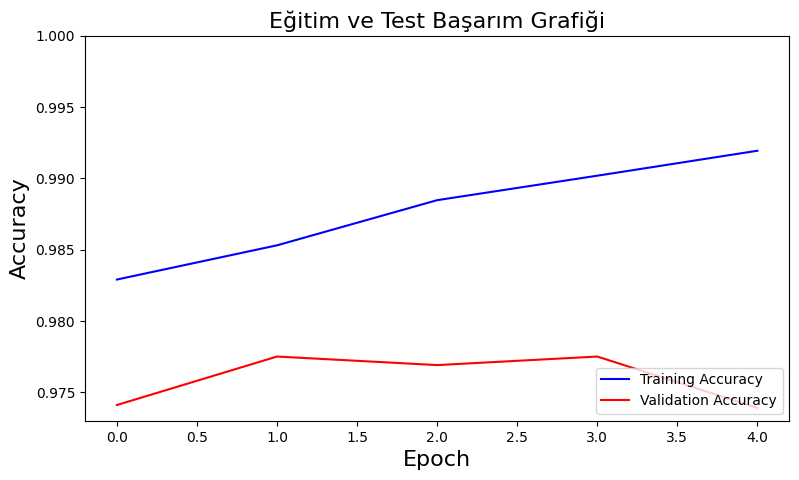

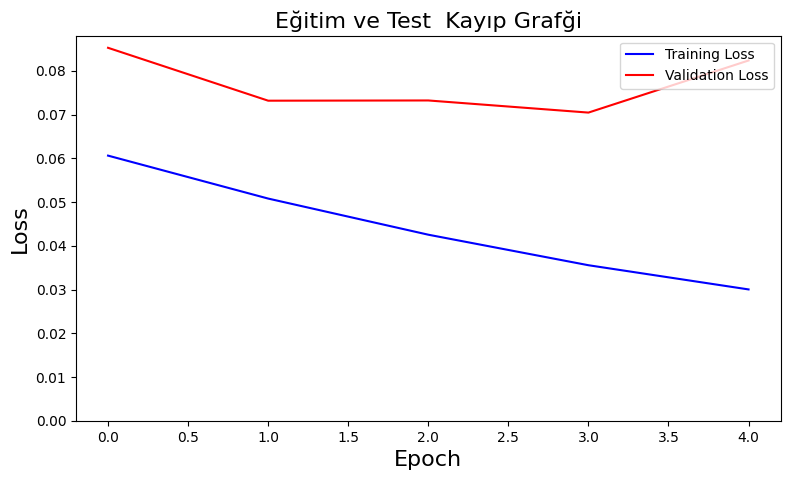

In [ ]:
#############################
# Accuracy ve Loss Grafikleri
#############################
#-------------------------------------- Grafik 1: Accuracy----------------------------#
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color = "b",label= "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "r", label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize= 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title("Eğitim ve Test Başarım Grafiği", fontsize = 16)


#-------------------------------------- Grafik 2: Loss ------------------------------#

plt.figure(figsize= (20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color= "b",label="Training Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc= "upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title("Eğitim ve Test  Kayıp Grafği",fontsize= 16)
plt.show()

In [ ]:
loss, precision, recall, acc = model.evaluate(x_test, y_test, verbose=False)
print("\nTest Accuracy: %.1f%%" % (100.0 * acc))
print("\nTest Loss: %.1f%%" % (100.0 * loss))
print("\nTest Precision: %.1f%%" % (100.0 * precision))
print("\nTest Recall: %.1f%%" % (100.0 * recall))



Test Accuracy: 97.4%

Test Loss: 8.2%

Test Precision: 97.7%

Test Recall: 97.2%


# 6.Modelin Kaydedilmesi ve Tahminleme İçin Kullanılması

In [ ]:
model.save("mnis_model.h5")

In [ ]:
import random

random_index = random.randint(0, x_test.shape[0])


In [ ]:
random_index

234

In [ ]:
test_image = x_test[random_index]

In [ ]:
y_test[random_index]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

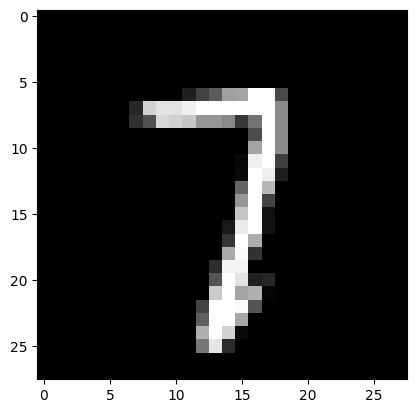

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap= "gray")

In [ ]:
test_data = x_test[random_index].reshape(1,28,28,1)

In [ ]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 82ms/step


In [ ]:
probability

array([[5.8276569e-06, 6.0829800e-04, 1.3145303e-03, 4.3019000e-03,
        4.2297874e-10, 2.8942702e-07, 5.7765293e-10, 9.9370754e-01,
        6.1961414e-06, 5.5452805e-05]], dtype=float32)

In [ ]:
predicted_class = np.argmax(probability)

In [ ]:
predicted_class

7

In [ ]:
print(f"Tahmn Edilen Sınıf: {predicted_class}\n")
print(f"Tahmin Edilen Sınıfın Olasılık Değeri:  {(np.max(probability, axis = -1))[0]}")
print(f"Diğer Sınıfların Olasılık Değerleri \n{probability}")

Tahmn Edilen Sınıf: 7

Tahmin Edilen Sınıfın Olasılık Değeri:  0.993707537651062
Diğer Sınıfların Olasılık Değerleri 
[[5.8276569e-06 6.0829800e-04 1.3145303e-03 4.3019000e-03 4.2297874e-10
  2.8942702e-07 5.7765293e-10 9.9370754e-01 6.1961414e-06 5.5452805e-05]]
